#### Import libraries


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust configuration of plots

In [2]:
original_df = pd.read_csv('movies.csv')
original_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Missing Data

In [3]:
for col in original_df.columns:
    pct_missing = np.mean(original_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df = original_df.dropna(subset= ['budget', 'gross', 'votes'])

#### Data Cleaning

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')
df['votes']= df['votes'].astype('int64')

df.head()

<ipython-input-6-6eb773930939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget']= df['budget'].astype('int64')
<ipython-input-6-6eb773930939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross']= df['gross'].astype('int64')
<ipython-input-6-6eb773930939>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
df[['release date', 'release year']]= df['released'].str.split(',', 1, expand=True)
df

C:\Users\hamdy\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release date,release year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980 (United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,January 17,2020 (United States)
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,February 14,2020 (United States)
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,January 17,2020 (United States)
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,February 21,2020 (United States)


In [8]:
#split the release locationm off the release year
df[['release month','release day']]= df['release date'].str.split(' ', 1 , expand=True)


C:\Users\hamdy\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df['release year'] = df['release year'].str[:5]
df.head()

<ipython-input-9-fdfad3638198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release year'] = df['release year'].str[:5]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release date,release year,release month,release day
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980,June,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980,July,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980,June,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980,July,2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980,July,25


In [12]:
#Drop unnecessary rows
df.drop('year', axis=1, inplace=True)
df.drop('released', axis=1, inplace=True)
df.drop('release date', axis=1, inplace=True)


In [13]:
df.sort_values(by=['gross'], inplace = False, ascending=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release year,release month,release day
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,December,18
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,April,26
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,December,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,December,18
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,April,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,June,4
3681,Ginger Snaps,Not Rated,Drama,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,May,11
272,Parasite,R,Horror,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982,March,12
2417,Madadayo,NaN,Drama,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993,April,17


# Set display option to displaying entire dataset

In [29]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', 100)
# df

In [24]:
#Drop any duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

# Correlations

#### Hypothesis 1: Budget is correlating with gross

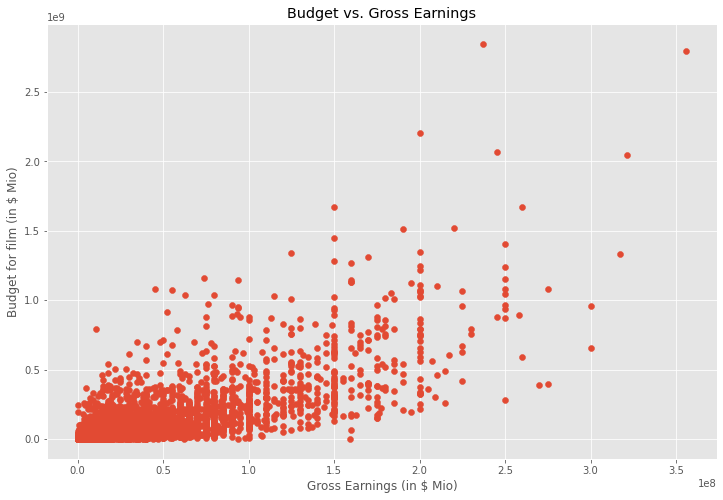

In [14]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings (in $ Mio)')
plt.ylabel('Budget for film (in $ Mio)')

plt.show()

[Text(0.5, 1.0, 'Budget vs. Gross Earnings'),
 Text(0.5, 0, 'Budget in $ Mil'),
 Text(0, 0.5, 'Gross Earnings in $ Mil')]

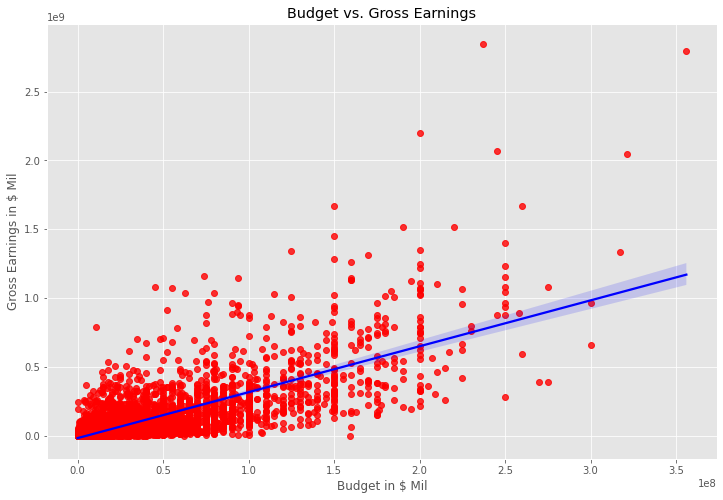

In [15]:
# Regression plot to highlight budget vs gross correlation

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}).set(title = 'Budget vs. Gross Earnings', xlabel='Budget in $ Mil', ylabel='Gross Earnings in $ Mil')
#sns.lmplot(x='budget', y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})


In [16]:
# Calculate Correlation
df.corr()

# three methods = pearson, kendall, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.414580,0.352437,0.318595,0.275596,1.000000


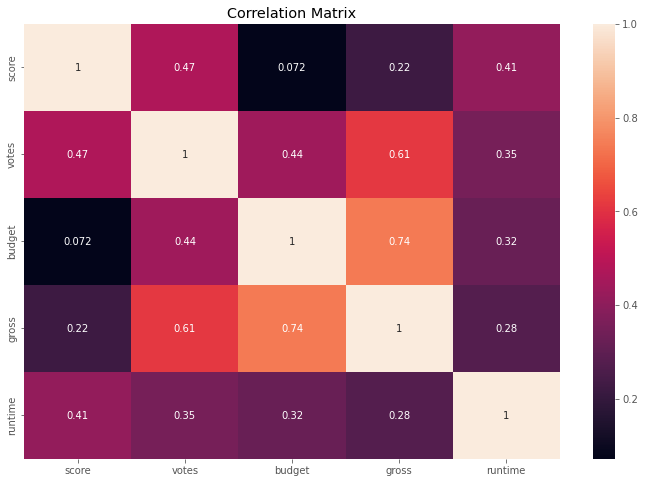

In [17]:
# Correlation of 0.74 between budget and gross earnings

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
# plt.xlabel('Gross Earnings (in $ Mio)')
# plt.ylabel('Budget for film (in $ Mio)')

plt.show()

# Hypothesis 2: Company high correlation with gross

In [22]:
df_numeric = df
for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype == 'object'):
       df_numeric[col_name]=  df_numeric[col_name].astype('category')
       df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release year,release month,release day
5445,387,5,0,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0,29,7,12
7445,389,5,0,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0,39,5,28
3045,4923,5,6,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0,17,7,13
6663,3656,5,0,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0,35,7,12
7244,390,5,0,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0,38,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,4.5,1900,1810,3112,187,47,5000000,2970,1382,97.0,14,11,35
3681,1599,3,6,6.8,43000,954,1687,528,6,5000000,2554,468,108.0,21,13,5
272,2921,6,9,3.9,2300,263,55,1477,47,800000,2270,584,85.0,2,12,6
2417,2401,-1,6,7.3,5100,23,1220,1687,26,11900000,596,492,134.0,13,5,11


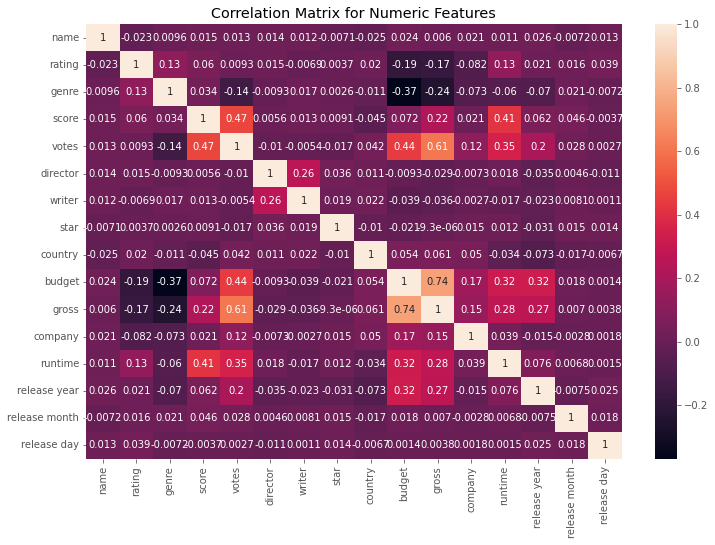

In [26]:
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [27]:
df_numeric.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release year,release month,release day
name,1.000000,-0.023013,0.009617,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.025950,-0.007216,0.012776
rating,-0.023013,1.000000,0.128102,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.021220,0.016205,0.038769
genre,0.009617,0.128102,1.000000,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.070389,0.021016,-0.007203
score,0.014955,0.059550,0.034061,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.061755,0.045603,-0.003655
votes,0.012915,0.009255,-0.136457,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.203966,0.027719,0.002696
director,0.013699,0.014847,-0.009303,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.034657,0.004565,-0.011283
writer,0.011602,-0.006923,0.017500,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.022511,0.008114,0.001108
star,-0.007109,0.003737,0.002619,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.031321,0.014537,0.014417
country,-0.024555,0.020148,-0.010847,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.072580,-0.016941,-0.006698
budget,0.023698,-0.186892,-0.368900,0.071792,0.440021,-0.009340,-0.039420,-0.021282,0.054372,1.000000,0.740395,0.171385,0.318595,0.321550,0.018254,0.001395


In [ ]:
correlation_mat = df_numeric.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

In [33]:
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes          gross            0.614904
gross          votes            0.614904
budget         gross            0.740395
gross          budget           0.740395
name           name             1.000000
release year   release year     1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
genre          genre            1.000000
rating         rating           1.000000
release month  release month    1.000000
release day    release day      1.000000
dtype: float64

# Hypothesis 2 Findings: The company is not actually correlating highly with the gross earnings of a movie. However it can be obsrved, that besides budget, votes have the highest correlation to gross earnings